

# Project: Investigate TMDb Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will be analysing the data set contains information about 10,000 movies collected from The Movie Database (TMDb), there are twenty one colums, including user ratings, revenue, budget, genres, and director, etc.
>
>● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>
>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them.  I leave them as is.
>
>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.
>
>**Questions in this project**: 
>
>Visualize the movie production trend over the years
>
>Visualize the profit trend over the years
>
>Which movie earns the most and least profit?
>
>Which movie has the most and least revenue?
>
>Which movie has the most and least budget?
>
>Which movie has the longest and shorest runtime?
>
>What is the correlation between movie rating and its profit?
>
>What elements makes a movie successful?
>



In [1]:
#importing important packages that I plan to use in this project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [4]:
# read the data and print out few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# there are 10866 rows and 21 columns.
df.shape

(10866, 21)

In [6]:
# summary statistics for numerical columns to assess data and build intuition
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Check for columns containing null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning


##### 1. Drop the columns that we will not use in this analysis


In [8]:
# deleting the columns from the database
df.drop(['id','imdb_id','homepage','overview','keywords','production_companies','vote_count','popularity', 'budget_adj', 'revenue_adj'],axis=1, inplace=True)


In [9]:
# take a look at this dataset 
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,7.3,2015


In [10]:
# check the colums contains null values again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   tagline         8042 non-null   object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 933.9+ KB


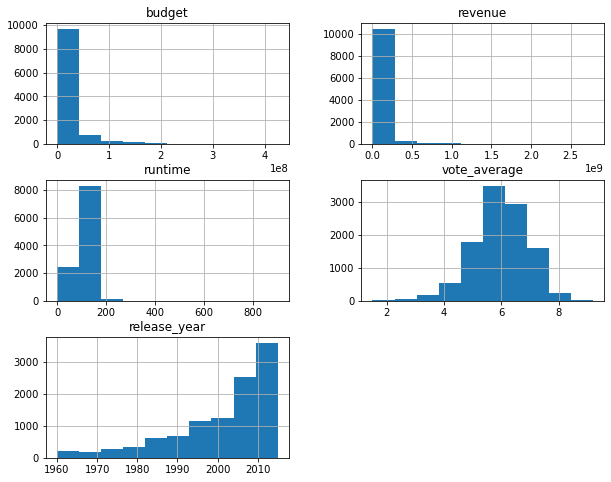

In [11]:
df.hist(figsize=(10,8));

In [12]:
df.fillna(df.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   tagline         8042 non-null   object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 933.9+ KB


##### 2. removing the duplicate rows if any 

In [13]:
df.drop_duplicates(keep = 'first', inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10865 non-null  int64  
 1   revenue         10865 non-null  int64  
 2   original_title  10865 non-null  object 
 3   cast            10789 non-null  object 
 4   director        10821 non-null  object 
 5   tagline         8041 non-null   object 
 6   runtime         10865 non-null  int64  
 7   genres          10842 non-null  object 
 8   release_date    10865 non-null  object 
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1018.6+ KB


#### 3. find 0 in budget and revenue, and delete them.

In [14]:
# creat a list of budget and revenue
BR = ['budget', 'revenue']

# replace the value '0' to NaN in budget and revenue 
df[BR] = df[BR].replace(0, np.NaN)

# drop any value which has NAH in budget and revenue
df.dropna(subset = BR, inplace = True)

In [15]:
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015


#### 4. change 0 as NaN in runtime column

In [16]:
df['runtime'] = df['runtime'].replace(0, np.NaN)
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015


#### 5. change release_date into a standard format 

In [17]:
# format release_date in datetime and store in dataframe
df.release_date = pd.to_datetime(df['release_date'])

#showing the dataset
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015


#### 6. check no duplicates in the dataframe

In [18]:
sum(df.duplicated())

0

Now we have finished cleaning the data!

<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1  Visualize the movie production trend over the years

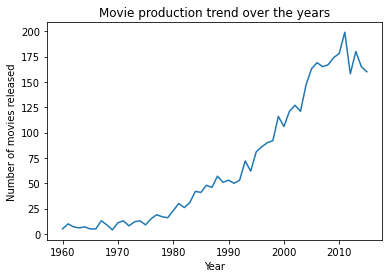

In [19]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

In [20]:
# year with lowest and highest movie production  
movies_per_year.idxmin() , movies_per_year.idxmax()

(1969, 2011)

> **We found the lowest movie production was in 1969, and through the rapid development of movie industry, 2011 has the highest movie production.**

### Research Question 2  Visualize the profit trend over the years

In [21]:
#create a new column 'profit_earned'
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015


In [22]:
# check datatype 
df.dtypes

budget                   float64
revenue                  float64
profit_earned            float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

In [23]:
#change budget, revenue and profit_earned to int64
change_type=['budget', 'revenue','profit_earned']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

budget                     int64
revenue                    int64
profit_earned              int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

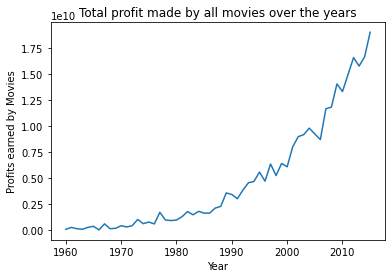

In [24]:
profits_year = df.groupby('release_year')['profit_earned'].sum()

plt.xlabel('Year')
plt.ylabel('Profits earned by Movies')
plt.title('Total profit made by all movies over the years')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [25]:
# year with lowest and highest movie profit  
profits_year.idxmin() , profits_year.idxmax()

(1966, 2015)

>**We found through the rapid development of movie industry, the total profit made by all movies over the years increased a lot as well, the lowest total profit was in 1966, and the highest total profit was in 2015.**

### Research Question 3 Which movie earns the most and least profit? 

In [26]:
#define a function which calculates lowest and highest values of columns
def highest_lowest(column):
    
    #highest
    #the highest number in profit column
    highest = df[column].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(df.loc[highest])
    
    #lowest
    #the lowest number in profit column
    lowest = df[column].idxmin()
    lowest_details = pd.DataFrame(df.loc[lowest])
    
    #collecting data in one place
    result = pd.concat([highest_details, lowest_details], axis = 1)
    
    return result

#calling the function and passing the argument
highest_lowest('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


>**Movie Avatar by James Cameron in 2009 has the highest profit with 2.54 billion. and movie the Warrior's Way by Sngmoo Lee in 2010 has the least profit since it loss a lot of money.**

### Research Question 4 Which movie has the most and least revenue ? 

In [27]:
#calling the function and passing the argument
highest_lowest('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


>**Movie Avatar by James Cameron in 2009 has the highest revenue with 2.78 billion, while movie Shattered Glass by Billy Ray in 2003 has the least revenue with only 2 dollors. I highly suspicious about this number!**

### Research Question 5 Which movie has the most and least budget ? 

In [28]:
#calling the function and passing the argument
highest_lowest('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


>**Movie the Warrior's Way by Sngmoo Lee in 2010 has the highest budget with 0.425 billion, while movie Lost & Found by Jeff Pollack in 1999 has the least budget with only 1 dollar. That number is unblieverble!**

### Research Question 6 Which movie has the longest and shortest runtime? 

In [29]:
#calling the function and passing the argument
highest_lowest('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


>**The longest runtime movie is Carlos by Olivier Assayas in 2010 with 338 mins (5hrs 38mins), and the shortest runtime movie is Kid's Stroy by Shinichiro Watanabe in 2003 with only 15 mins!**

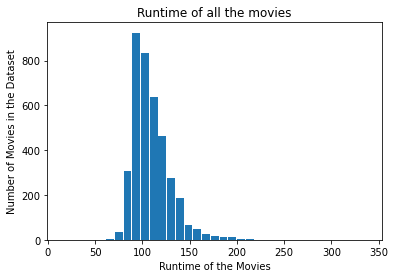

In [30]:
#plotting a histogram of runtime of movies

#on x-ax
plt.xlabel('Runtime of the Movies')
#on y-axis 
plt.ylabel('Number of Movies in the Dataset')
#name of the graph
plt.title('Runtime of all the movies')

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

C:\Users\xuwen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


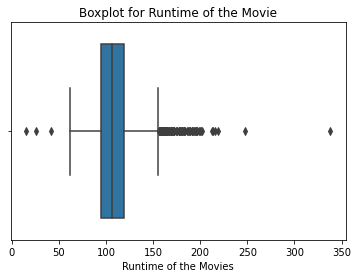

In [40]:
#outliers of this distribution.
#using seaborn to plot
#plotting box plot
sb.boxplot(df['runtime'])
#on x-ax
plt.xlabel('Runtime of the Movies')
#name of the graph
plt.title('Boxplot for Runtime of the Movie')

#showing the plot
plt.show()

In [32]:
# averge runtime of one movie 
df['runtime'].mean()

109.22029060716139

In [33]:
# the statistics summary of runtime
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>**The distribution of movie runtime is right skewed, mostly distributed between 95mins to 119mins. The average movie runtime is 109.22mins. More outliers are distributed on the right side of the boxplot.**

### Research Question 7 What is the correlation between movie rating and its profit?

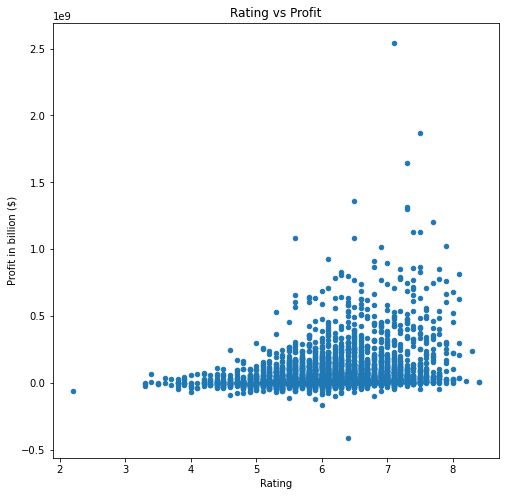

In [34]:
df.plot(x='vote_average',y='profit_earned',kind='scatter',figsize=(8,8));
plt.ylabel('Profit in billion ($)');
plt.xlabel('Rating');
plt.title('Rating vs Profit');

In [35]:

#Calculation of Pearson's correlation coefficient
def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()



In [36]:
# the correlation coefficient of voting rate and movie profit
df1=df[(df['vote_average']>0) & (df['profit_earned']>0)]
correlation_coeff(df1['vote_average'],df1['profit_earned'])

0.2198309128691112

>**There is no strong evidence to approve voting rate has impact on movie profit, either from the graph or correlation coefficient.**

### Research Question 8 What is the correlation between movie budget and its revenue?

In [37]:
df2=df[(df['budget']>0) & (df['revenue']>0)]
df2.shape

(3854, 12)

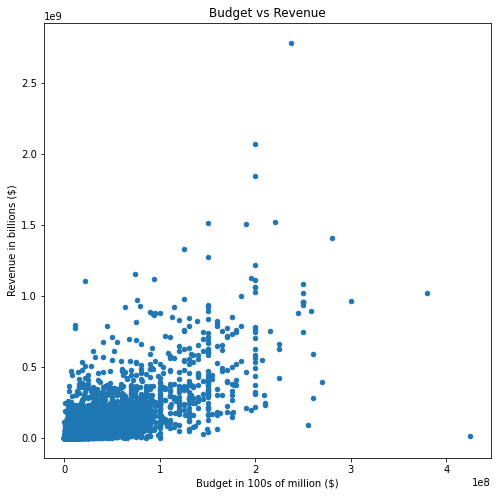

In [38]:
df2.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8));
plt.title('Budget vs Revenue')
plt.xlabel('Budget in 100s of million ($)');
plt.ylabel('Revenue in billions ($)');

In [39]:
correlation_coeff(df2['budget'],df2['revenue'])

0.688556152463676

>**There is a positive correlation between budget and revenue. Especially when budget exceed 100 million dollar, if a movie have more budget, it will have more tendency to have better revenue.**

### Research Question 9 What elements makes a movie successful?

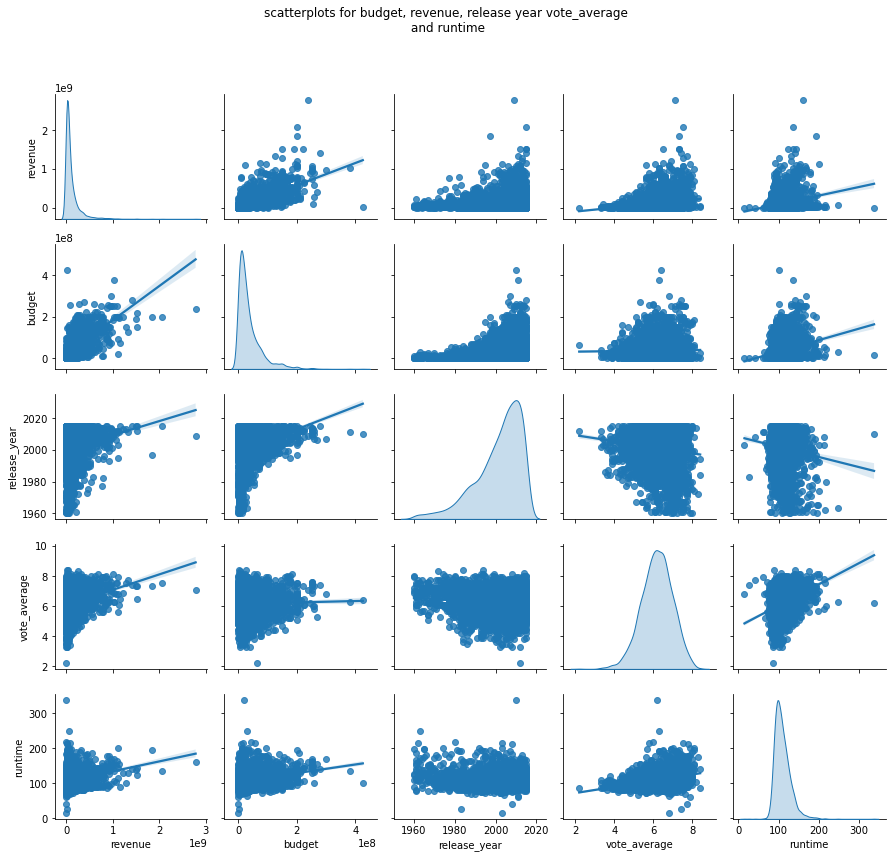

In [31]:
#use seaborn to draw a scatterplot matrix
new_df = df[['revenue', 'budget', 'release_year', 'vote_average','runtime']]
#pd.plotting.scatter_matrix(new_df, figsize=(18,18));


new = sb.pairplot(new_df,kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
new.fig.suptitle('scatterplots for budget, revenue, release year vote_average\n and runtime')
new.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

>**Looks like there is a positive correlation between budget and revenue, and a very slight positive correlation with release year and budget. With average rating slightly positive influenced by budget. Therefore, the analysis here is limited. This does not indicate a causation in improvement in revenue/rating.**

<a id='conclusions'></a>
## Conclusions

> **Through the analysis of The Movie Database (TMDb), we started from cleaning the data, wrangling the data, and exploring the data in certain aspect, we found some correlations between few varialbes but we have not set any hypothesis test yet, and we have not analyzed each variable in this dataset. Therefore, a much deeper analysis would be required to find the bigger picture.**
>
>**Moreover, there are some limitations for exploring the dataset:**
>
>**1. we are not sure whether the data was completely correct or up-to-date.**
>
>**2. The budget and revenue columns do not have currency unit, it might be possible that some movies have different currency in budget and revenue columns.**
>
>**3. Dropping certain rows or columns with missing values also affect the overall analysis.**
>
>**4. The size of the dataset might not sufficient to give a good judgment about the questions I asked.**


